# IMDb Sentiment Analysis

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import re
import joblib
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer , WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , precision_score , f1_score , accuracy_score , recall_score

In [3]:
# Load The Dataset 

In [4]:
df = pd.read_csv("IMDb Dataset.csv")

In [5]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.shape

(50000, 2)

In [9]:
# Preprocessing

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

418

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(49582, 2)

In [14]:
# EDA

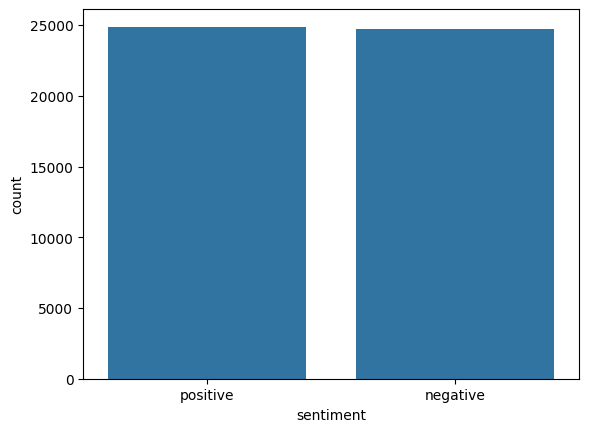

In [15]:
sns.barplot(df["sentiment"].value_counts())
plt.show()

In [16]:
# Text Preprocccessing

In [17]:
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

In [18]:
def preprocess(text):

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    
    preprocessed_words = [

        stemmer.stem(word)
        for word in words
        if word not in stop_words
    ]

    return " ".join(preprocessed_words)

In [19]:
df["cleaned_review"] = df["review"].apply(preprocess)

In [20]:
df["cleaned_review"][0]

'one review mention watch oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort

In [21]:
# Encoding

In [22]:
df["sentiment"] = df["sentiment"].map({"positive":1,"negative":0})

In [23]:
df["sentiment"].unique()

array([1, 0], dtype=int64)

In [24]:
# Vectorization

In [25]:
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"]

In [26]:
# train test split

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [28]:
# Model Training

In [29]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Naive_Bayes" : MultinomialNB()
}

Logistic Regression | Accuracy Score : 88.202%
Logistic Regression | Precision Score : 86.957%
Logistic Regression | Recall Score : 89.996%
Logistic Regression | F1-Score : 88.450%


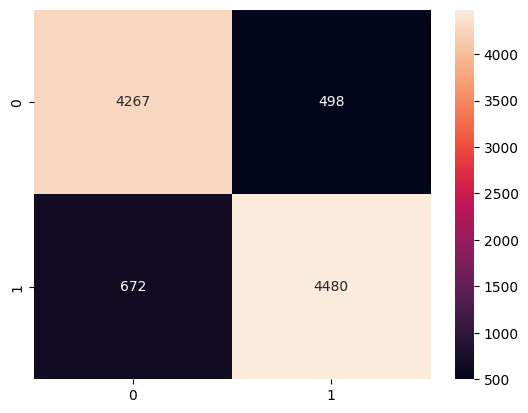

Naive_Bayes | Accuracy Score : 84.764%
Naive_Bayes | Precision Score : 84.456%
Naive_Bayes | Recall Score : 85.356%
Naive_Bayes | F1-Score : 84.904%


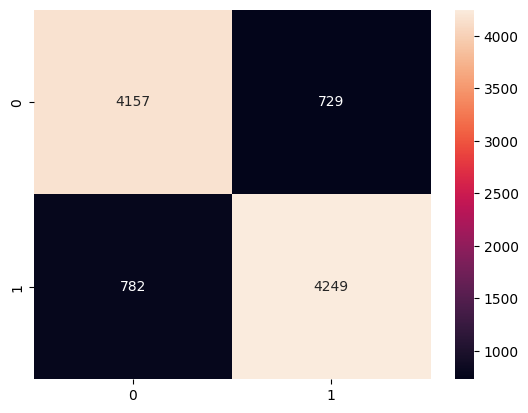

In [30]:
for name , model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(f"{name} | Accuracy Score : {accuracy_score(y_test , y_pred)*100:.3f}%")
    print(f"{name} | Precision Score : {precision_score(y_test , y_pred)*100:.3f}%")
    print(f"{name} | Recall Score : {recall_score(y_test , y_pred)*100:.3f}%")
    print(f"{name} | F1-Score : {f1_score(y_test , y_pred)*100:.3f}%")
    cm = confusion_matrix(y_pred , y_test)
    sns.heatmap(cm , annot=True , fmt='g')
    plt.show()

In [31]:
final_model = LogisticRegression()
final_model.fit(x_train , y_train)

LogisticRegression()

In [41]:
joblib.dump(final_model , "Sentiment_Model.pkl")
joblib.dump(vectorizer , "Vectorizer.pkl")
print("Model Saved Succesfully.")

Model Saved Succesfully.
